#**Exercise 3**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.datasets import load_wine
wine = load_wine()

print(wine.data.shape)
A = wine.data
for i in range(A.shape[1]):
  A[:,i] = -1 + 2*((A[:,i]-min(A[:,i]))/(max(A[:,i])-min(A[:,i])))
print(wine.target.shape)

print("No. of classes are ",len(np.unique(wine.target)), "\nand they are labeled as ", np.unique(wine.target)) 


(178, 13)
(178,)
No. of classes are  3 
and they are labeled as  [0 1 2]


In [ ]:
n = wine.data.shape[0]
d = wine.data.shape[1]

In [ ]:
y = 1.0*np.ones([A.shape[0],1])
for i in range(wine.target.shape[0]):
  if wine.target[i] != 1:
    y[i] = -1

In [ ]:
indexarr = np.arange(n) 
np.random.shuffle(indexarr)

train_data = []
train_label = []
test_data = []
test_label = []
count = 1
for i in indexarr:
  if count <= int(0.8*n):
    train_data.append(list(A[i]))
    train_label.append(list(y[i]))
  else:
    test_data.append(list(A[i]))
    test_label.append(list(y[i]))
  count = count + 1
train_data = np.array(train_data)
train_label = np.array(train_label)
test_data = np.array(test_data)
test_label = np.array(test_label)

Coding required functions:

In [ ]:
def predict(w,x):
  a = np.matmul(w.T, x)
  if a > 0:
    return 1
  elif a ==0:
    return 0  
  else:
    return -1

In [ ]:
def compute_accuracy(data,labels,w):
  c = 0
  for i in range(len(labels)):
    term_2 = np.reshape(data[i], (np.shape(data)[1],1))
    if predict(w, term_2) == labels[i]:
      c = c + 1
  return c/len(labels)

In [ ]:
def compute_loss_h(model_w,x,y):
  return max(0, np.subtract(1, np.dot(y, np.dot(model_w.T, x))))

In [ ]:
def compute_objfnval_h(data,labels,model_w):
  return np.add(np.multiply(lamda/2 , np.linalg.norm(model_w)**2), sum(compute_loss_h(model_w,data[i],labels[i]) for i in range(data.shape[0]))/data.shape[0])


In [ ]:
def compute_grad_loss_h(x,y,w,i):
  loss = 0
  if np.multiply(y[i], np.dot(w, np.transpose(x[i]))) >= 1:
    loss = np.multiply(lamda, w)/x.shape[0]
  else:
    loss = np.subtract(np.multiply(lamda, w), np.multiply(y[i], np.transpose(x[i])))/x.shape[0]
  return loss


**Que 3)**

In [ ]:
def compute_orthogonal_projection(u):
  sum = np.sum(abs(u[i]) for i in range( len(u)))
  if sum<=1:
    u = u
  if sum>1:
    for i in range( len(u)):
      u[i] = u[i]/sum
  return u  

In [ ]:
def OPT1_h(data, label, lamda, epochs):
  t = 1
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  obj_fun = []
  test_accuracy = []
  train_accuracy = []
  for epoch in range(epochs):
    np.random.shuffle(arr) 
    for i in np.nditer(arr): 
      step = 1/t
      w =  compute_orthogonal_projection( np.subtract(w, np.multiply(step, compute_grad_loss_h(data,y,w,i))))
      t = t+1
      if t>1e4:
        t = 1
    obj = compute_objfnval_h(data,label,w)
    train_acc = compute_accuracy(train_data, train_label, w)  
    test_acc = compute_accuracy(test_data, test_label, w)  
    obj_fun.append(obj)    
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

  return w, obj_fun, test_accuracy, train_accuracy

**Que 4.**
a)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


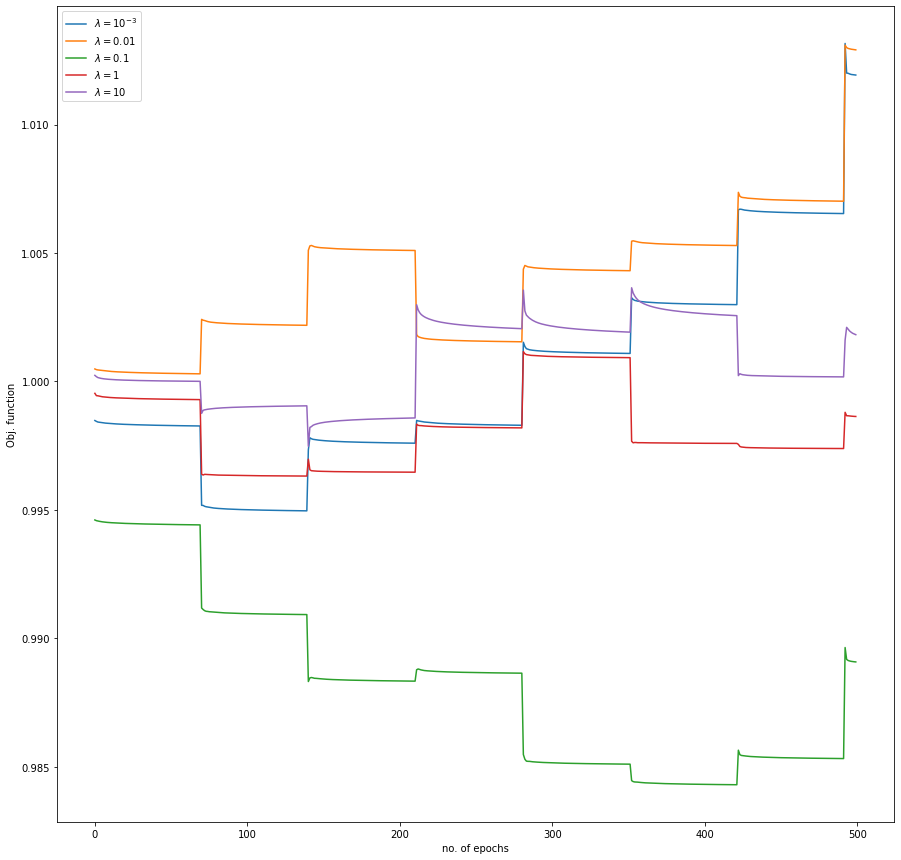

In [ ]:
num_epoch = 500
lambda_lst = [0.001, 0.01 ,0.1, 1, 10]
plt.figure(figsize=(15,15))
for lamda in lambda_lst:
  w, fun_value, test, train = OPT1_h(train_data,train_label,lamda, num_epoch)
  plt.plot(fun_value)
plt.xlabel('no. of epochs')
plt.ylabel('Obj. function')
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
plt.show()

**b)**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


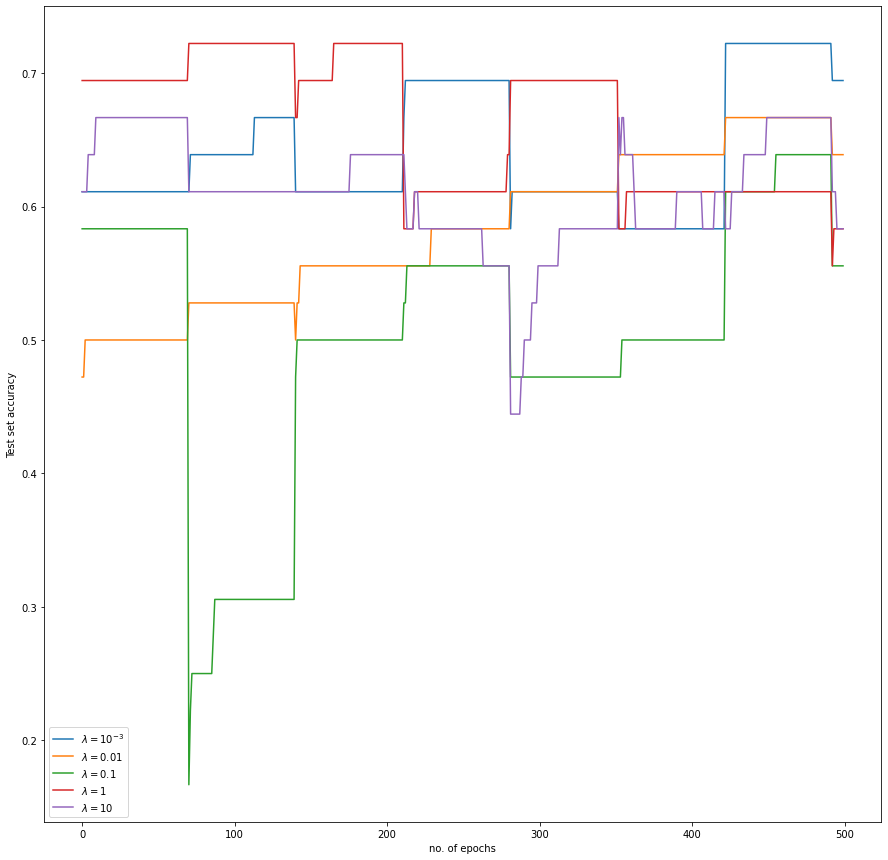

In [ ]:
num_epoch = 500
lambda_lst = [0.001, 0.01 ,0.1, 1, 10]
plt.figure(figsize=(15,15))
for lamda in lambda_lst:
  w, fun_value, test, train = OPT1_h(train_data,train_label,lamda, num_epoch)
  plt.plot(test)
plt.xlabel('no. of epochs')
plt.ylabel('Test set accuracy')
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
plt.show()

**c)**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


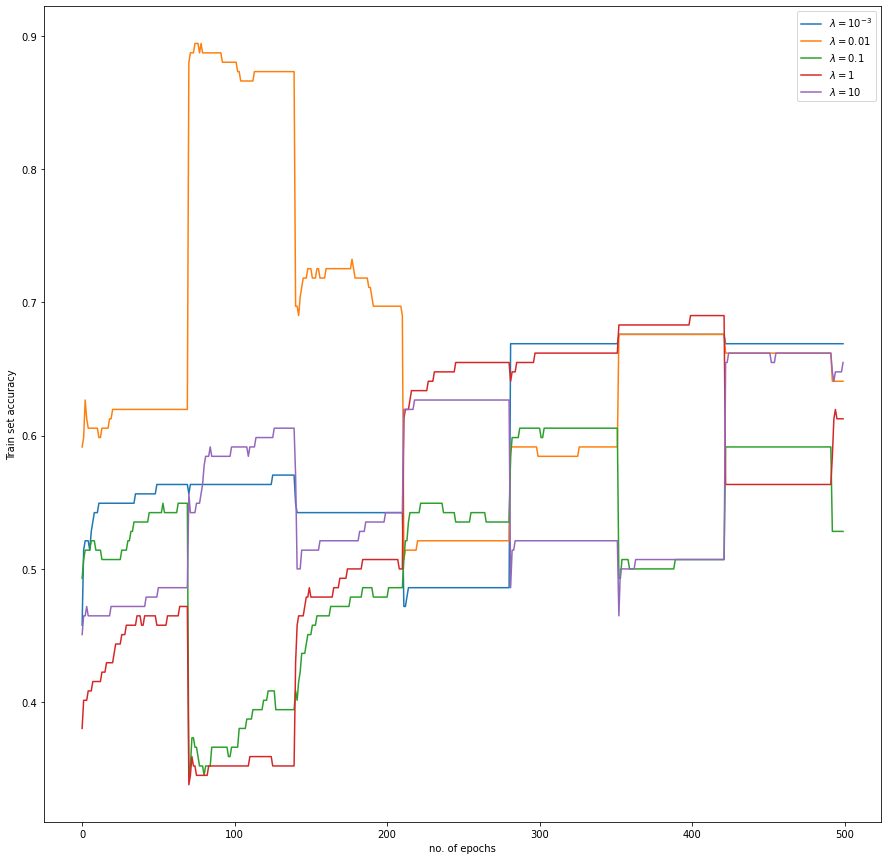

In [ ]:
num_epochs = 500
lambda_lst = [0.001, 0.01,0.1, 1, 10]
plt.figure(figsize=(15,15))
for lamda in lambda_lst:
  w, fun_value, test, train = OPT1_h(train_data,train_label,lamda, num_epochs)
  plt.plot(train)
plt.xlabel('no. of epochs')
plt.ylabel('Train set accuracy')
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
plt.show()

**d)**

In [ ]:
num_epochs = 500
table_plt = [["lamda values" , "Test accuracy" , "Traininig accuracy"]]
lamda_lst = [0.001 ,0.01 , 0.1 , 1 , 10]
for lamda in lamda_lst:
  w , f_val , test , train = OPT1_h(train_data , train_label , lamda , num_epochs)
  table_plt.append([lamda , test[-1] , train[-1]])
print(tabulate(table_plt , headers = 'firstrow', tablefmt = 'fancygrid'))   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


  lamda values    Test accuracy    Traininig accuracy
--------------  ---------------  --------------------
         0.001         0.694444              0.457746
         0.01          0.527778              0.359155
         0.1           0.666667              0.626761
         1             0.694444              0.669014
        10             0.555556              0.415493


**e)**
We can observe that with changing values of lamda test set accuracy and training set accuracy are almost changing.
Highest test set and training set accuracy is 69% for both. 

**Que 5)**

# $L_l$

In [ ]:
def compute_loss_log(model_w,x,y):
  return np.log(np.add(1, np.exp(-np.dot(y, np.dot(model_w.T, x)))))

In [ ]:
def compute_objfnval_log(data,labels,model_w):
  return np.add(np.multiply(lamda/2 , np.linalg.norm(model_w)**2), sum(compute_loss_log(model_w,data[i],labels[i]) for i in range(data.shape[0]))/data.shape[0])


In [ ]:
def compute_grad_loss_log(data, label,model_w ,i):
  return np.subtract(np.multiply(lamda, model_w), np.multiply(np.multiply(label[i], np.transpose(data[i])), np.exp(-np.dot(label[i], np.dot(model_w, np.transpose(data[i])))))/np.add(1, np.exp(-np.dot(label[i], np.dot(model_w, np.transpose(data[i]))))))/data.shape[0]


In [ ]:
def OPT1_log(data, label, lamda, epochs):
  t = 1
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  obj_fun = []
  test_accuracy = []
  train_accuracy = []
  for epoch in range(epochs):
    np.random.shuffle(arr) 
    for i in np.nditer(arr): 
      step = 1/t
      w =  compute_orthogonal_projection( np.subtract(w, np.multiply(step, compute_grad_loss_log(data,y,w,i))))
      t = t+1
      if t>1e4:
        t = 1
    obj = compute_objfnval_h(data,label,w)
    train_acc = compute_accuracy(train_data, train_label, w)  
    test_acc = compute_accuracy(test_data, test_label, w)  
    obj_fun.append(obj)    
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
   

  return w, obj_fun, test_accuracy, train_accuracy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


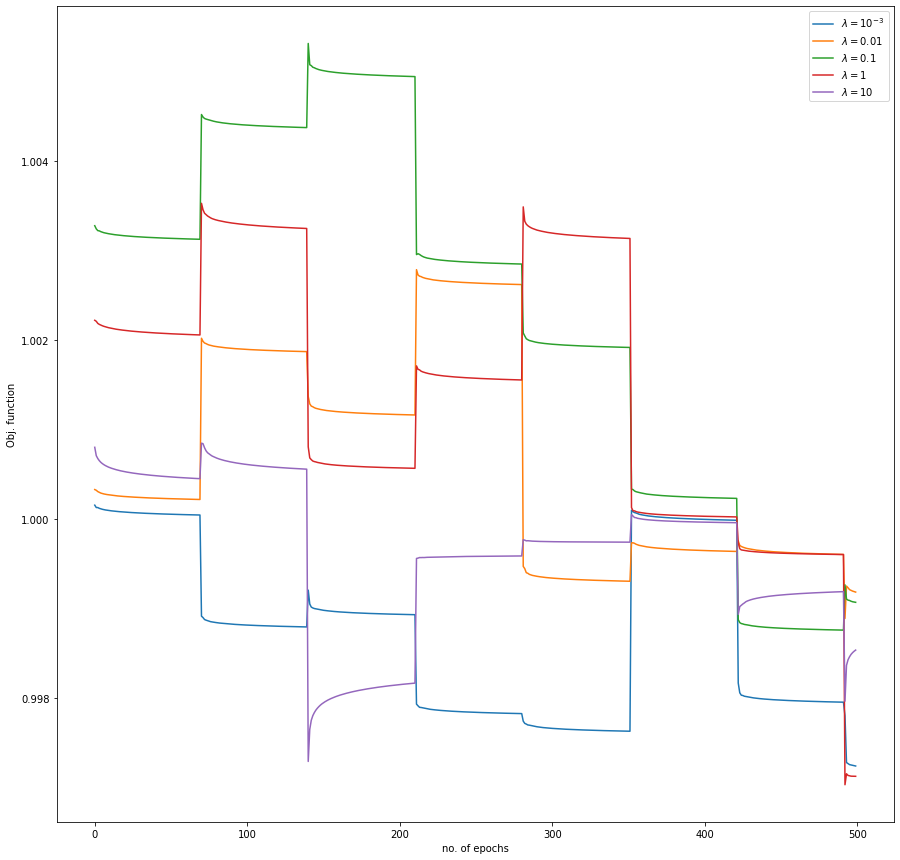

In [ ]:
num_epochs = 500
lambda_lst = [0.001, 0.01,0.1, 1, 10]
plt.figure(figsize=(15,15))
for lamda in lambda_lst:
  w, fun_value, test, train = OPT1_log(train_data,train_label,lamda, num_epochs)
  plt.plot(fun_value)
plt.xlabel('no. of epochs')
plt.ylabel('Obj. function')
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


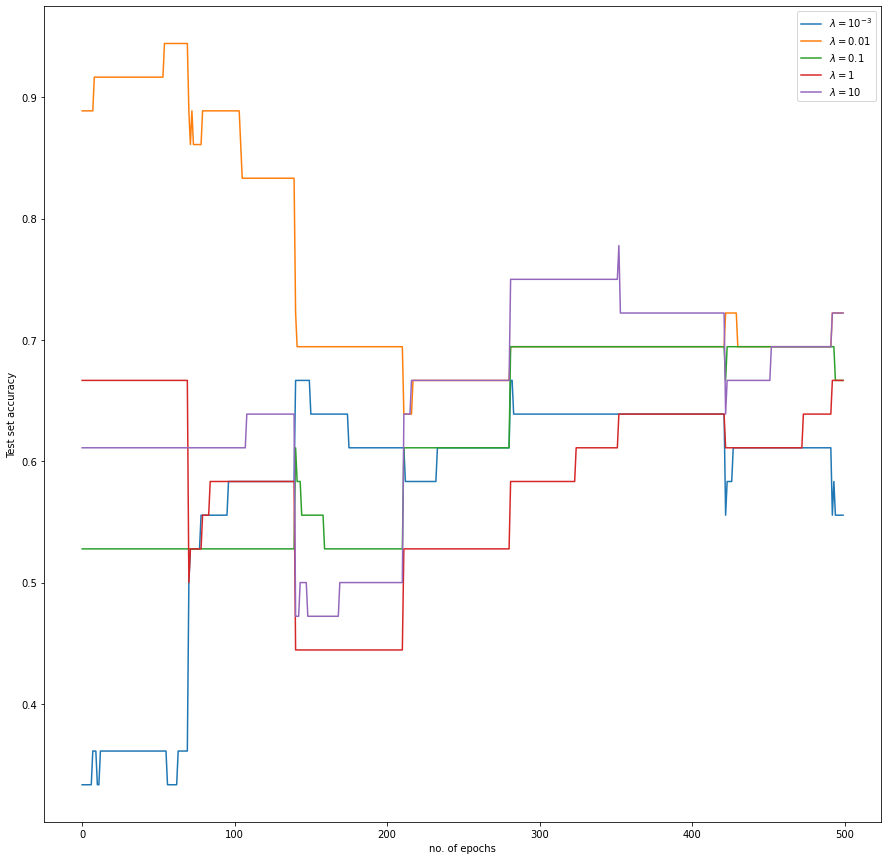

In [ ]:
num_epochs = 500
lambda_lst = [0.001, 0.01,0.1, 1, 10]
plt.figure(figsize=(15,15))
for lamda in lambda_lst:
  w, fun_value, test, train = OPT1_log(train_data,train_label,lamda, num_epochs)
  plt.plot(test)
plt.xlabel('no. of epochs')
plt.ylabel('Test set accuracy')
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
plt.show() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


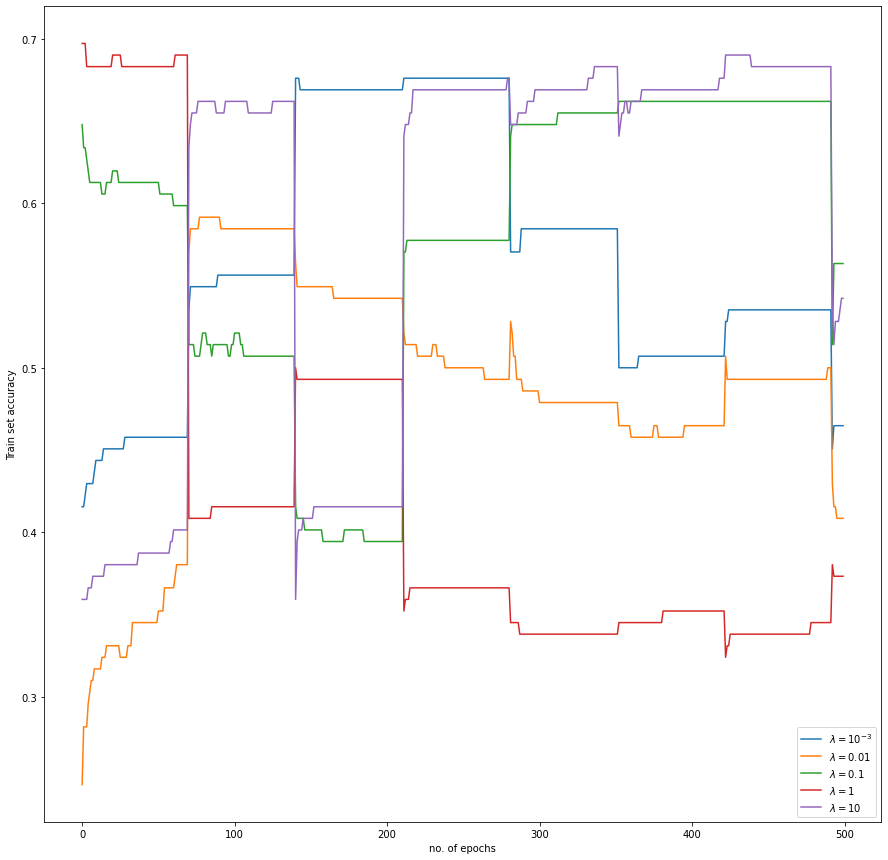

In [ ]:
num_epochs = 500
lambda_lst = [0.001, 0.01,0.1, 1, 10]
plt.figure(figsize=(15,15))
for lamda in lambda_lst:
  w, fun_value, test, train = OPT1_log(train_data,train_label,lamda, num_epochs)
  plt.plot(train)
plt.xlabel('no. of epochs')
plt.ylabel('Train set accuracy')
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
plt.show() 

In [ ]:
num_epochs = 500
table_plt = [["lamda values" , "Test accuracy" , "Traininig accuracy"]]
lamda_lst = [0.001 ,0.01 , 0.1 , 1 , 10]
for lamda in lamda_lst:
  w , f_val , test_acc , train_acc = OPT1_log(train_data , train_label , lamda , num_epochs)
  table_plt.append([lamda , test_acc[-1] , train_acc[-1]])
print(tabulate(table_plt , headers = 'firstrow', tablefmt = 'fancygrid'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


  lamda values    Test accuracy    Traininig accuracy
--------------  ---------------  --------------------
         0.001         0.722222              0.65493
         0.01          0.638889              0.591549
         0.1           0.722222              0.507042
         1             0.638889              0.640845
        10             0.583333              0.647887


We can observe that with changing values of lamda test set accuracy and training set accuracy are not varying that much.
Highest test set accuracy is 72% and training set accuracy is 65%.

**Que 5)**

#$L_{sh}$

In [ ]:
def compute_loss_sq_h(model_w,x,y):
  return (max(0, np.subtract(1, np.dot(y, np.dot(model_w.T, x)))))**2

In [ ]:
def compute_objfnval_sq_h(data,labels,model_w):
  return np.add(np.multiply(lamda/2 , np.linalg.norm(model_w)**2), sum(compute_loss_sh(model_w,data[i],labels[i]) for i in range(data.shape[0]))/data.shape[0])

In [ ]:
def compute_grad_loss_sq_h(x,y,w,i):
  loss = 0
  if np.dot(y[i], np.dot(w, np.transpose(x[i]))) >= 1:
    loss = np.multiply(lamda, w)/x.shape[0]
  else:
    loss = np.subtract(np.multiply(lamda, w), np.multiply(np.multiply(2, np.subtract(1, np.dot(y[i], np.dot(w, np.transpose(x[i]))))), np.multiply(y[i], np.transpose(x[i]))))/x.shape[0]
  return loss

In [ ]:
def OPT1_sq_h(data, label, lamda, epochs):
  t = 1
  w = np.zeros(data.shape[1])
  arr = np.arange(data.shape[0])
  obj_fun = []
  test_accuracy = []
  train_accuracy = []
  for epoch in range(epochs):
    np.random.shuffle(arr) 
    for i in np.nditer(arr): 
      step = 1/t
      w =  compute_orthogonal_projection( np.subtract(w, np.multiply(step, compute_grad_loss_sq_h(data,y,w,i))))
      t = t+1
      if t>1e4:
        t = 1
    obj = compute_objfnval_h(data,label,w)
    train_acc = compute_accuracy(train_data, train_label, w)  
    test_acc = compute_accuracy(test_data, test_label, w)  
    obj_fun.append(obj)    
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
    
  return w, obj_fun, test_accuracy, train_accuracy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


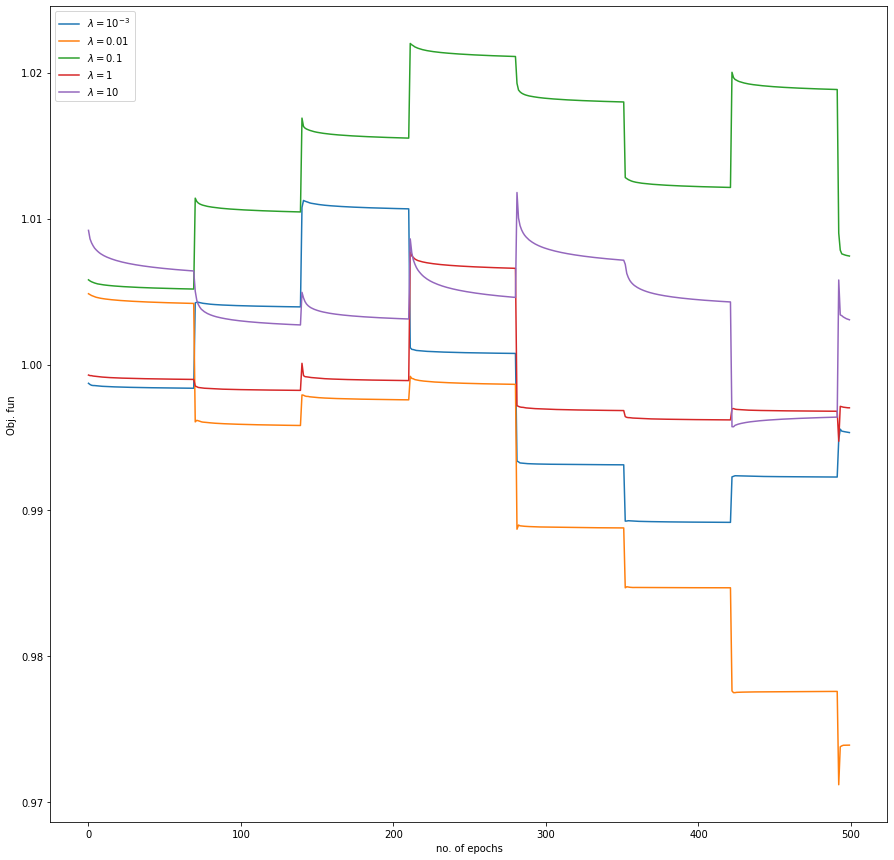

In [ ]:
num_epochs = 500
lambda_lst = [0.001, 0.01,0.1, 1, 10]
plt.figure(figsize=(15,15))
for lamda in lambda_lst:
  w, fun_value, test, train = OPT1_sq_h(train_data,train_label,lamda, num_epochs)
  plt.plot(fun_value)
plt.xlabel('no. of epochs')
plt.ylabel('Obj. fun')
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
plt.show() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


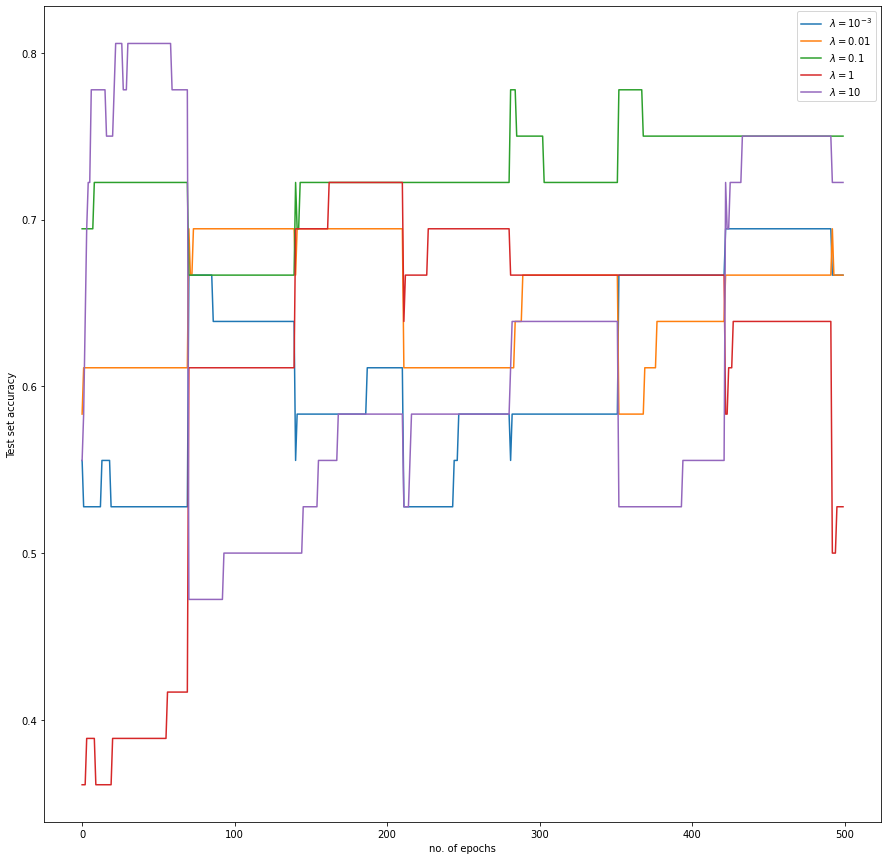

In [ ]:
num_epochs = 500
lambda_lst = [0.001, 0.01,0.1, 1, 10]
plt.figure(figsize=(15,15))
for lamda in lambda_lst:
  w, fun_value, test, train = OPT1_sq_h(train_data,train_label,lamda, num_epochs)
  plt.plot(test)
plt.xlabel('no. of epochs')
plt.ylabel('Test set accuracy')
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
plt.show() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


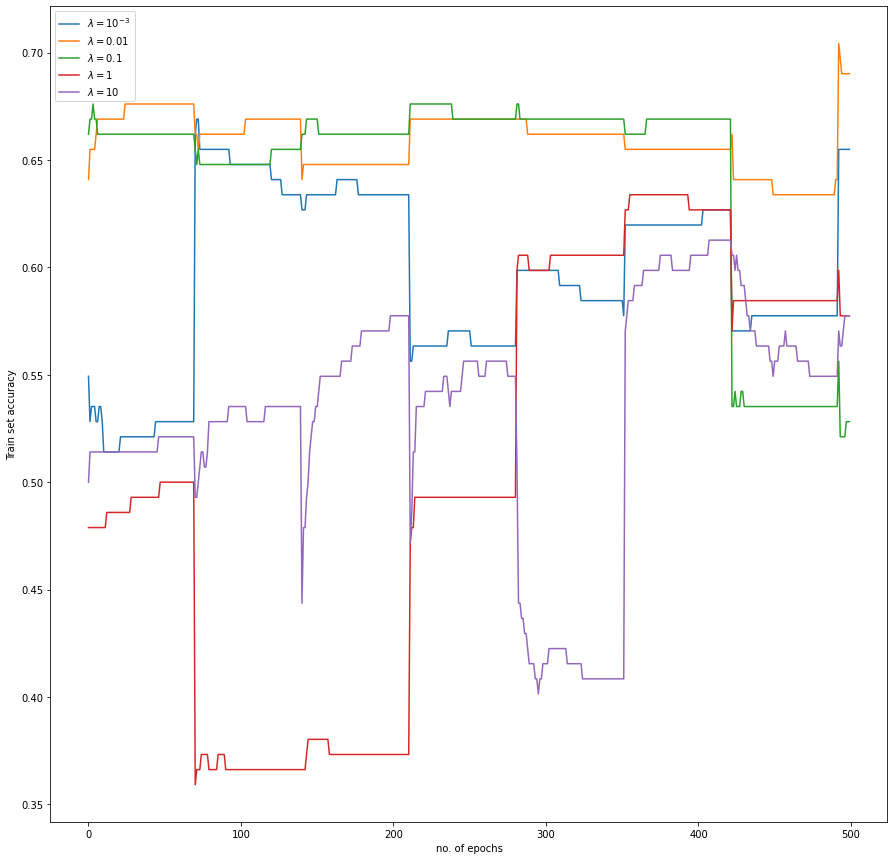

In [ ]:
num_epochs = 500
lambda_lst = [0.001, 0.01,0.1, 1, 10]
plt.figure(figsize=(15,15))
for lamda in lambda_lst:
  w, fun_value, test, train = OPT1_sq_h(train_data,train_label,lamda, num_epochs)
  plt.plot(train)
plt.xlabel('no. of epochs')
plt.ylabel('Train set accuracy')
plt.legend(["$\lambda = 10^{-3}$","$\lambda = 0.01$", "$\lambda = 0.1$", "$\lambda = 1$", "$\lambda = 10$"])
plt.show() 

In [ ]:
num_epochs = 500
table_plt = [["lamda values" , "Test accuracy" , "Traininig accuracy"]]
lamda_lst = [0.001 ,0.01 , 0.1 , 1 , 10]
for lamda in lamda_lst:
  w , f_val , test_acc , train_acc = OPT1_sq_h(train_data , train_label , lamda , num_epochs)
  table_plt.append([lamda , test_acc[-1] , train_acc[-1]])
print(tabulate(table_plt , headers = 'firstrow', tablefmt = 'fancygrid'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


  lamda values    Test accuracy    Traininig accuracy
--------------  ---------------  --------------------
         0.001         0.638889              0.443662
         0.01          0.666667              0.591549
         0.1           0.583333              0.380282
         1             0.583333              0.408451
        10             0.694444              0.535211


We can observe that with changing values of lamda test set accuracy and training set accuracy are also changing.
Highest test set accuracy is 69% and training set accuracy is 59% .

From all the observations I can conclude that I am getting better accuracy by using logistic function compared to hinge loss and squared hinge loss function.